In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the CSV file into a DataFrame
file_path = '/Users/erikborn/Documents/Python/jupyter/printerData.csv'
df = pd.read_csv(file_path)

df.rename(columns={'Which building do you primarily work in?': 'Building'}, inplace=True)
df.rename(columns={'How often do you need to print in color?': 'Color Printing'}, inplace=True)
# Display the first 5 rows of the DataFrame
df.head()

,Timestamp,Building,Which printer(s) do you use the most?,Color Printing,What do you like about our printers?,How could we make your printing experience better?,Is there any other feedback that you would like to submit?
0,12/16/2024 11:06:03,High School,"HS Faculty Lounge, HS Library, MS Faculty Lounge",3,"I like the printer in HS Faculty Lounge, it is...",I hope the printer in HS Faculty Lounge has th...,NaN
1,12/16/2024 11:07:17,Lower School,"LS Faculty Lounge, LS Office (Jackie)",3,They generally take care of what I need for my...,Improve connectivity reliability and print pro...,I understand that we don't want students to ha...
2,12/16/2024 11:07:31,High School,"HS Faculty Lounge, HS Office (Meghan)",3,I appreciate that it's easy to print double-si...,I always worry that I am disturbing Meghan in ...,NaN
3,12/16/2024 11:11:07,High School,"HS Faculty Lounge, HS Library",4,It works smoothly.,It would be better if the library printer coul...,NaN
4,12/16/2024 11:13:42,High School,HS Faculty Lounge,1,NaN,NaN,NaN


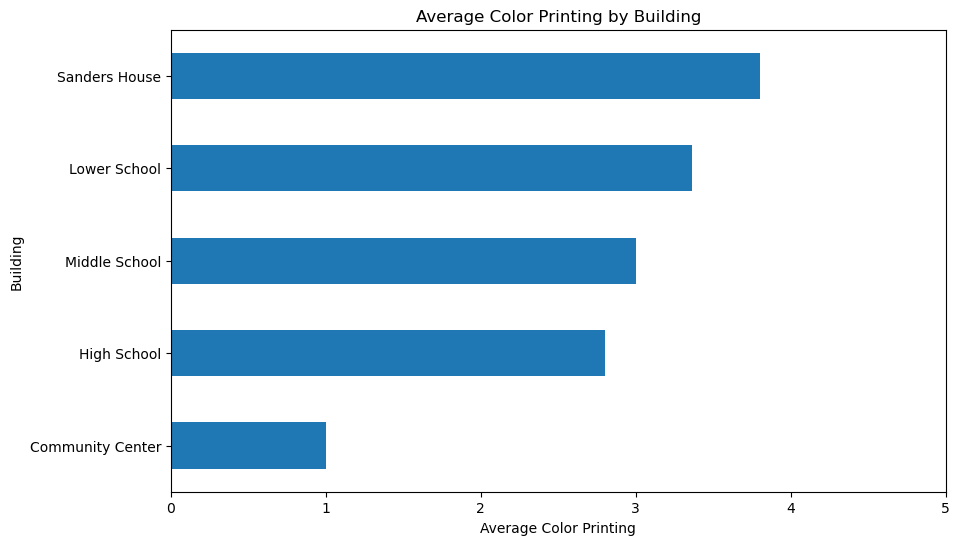

In [13]:
# Group by 'Building' and calculate the average of 'Color Printing'
color_avg_by_building = df.groupby('Building')['Color Printing'].mean().sort_values()

# Plot the results as a horizontal bar graph
plt.figure(figsize=(10, 6))  # Adjust size if needed
color_avg_by_building.plot(kind='barh')

# Set x-axis limits to 0 to 5
plt.xlim(0, 5)

# Add labels and title
plt.xlabel('Average Color Printing')
plt.ylabel('Building')
plt.title('Average Color Printing by Building')

# Show the plot
plt.show()

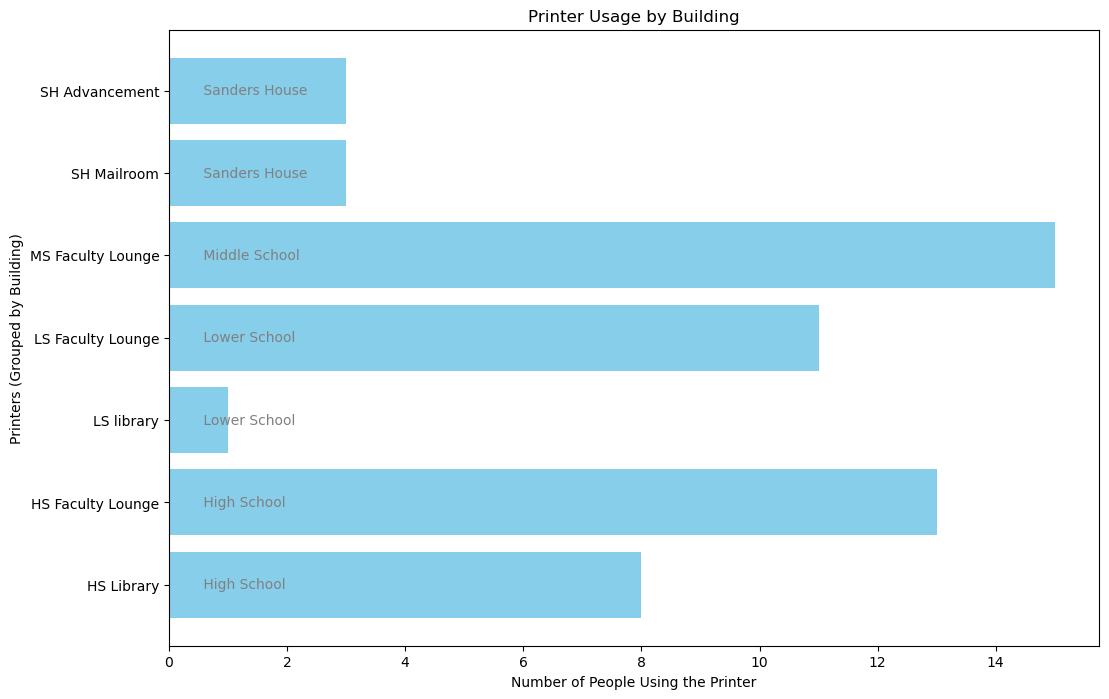

In [23]:
# Step 1: Explode the "Which printer(s) do you use the most?" column
df_exploded = df.assign(Printers=df['Which printer(s) do you use the most?'].str.split(',')).explode('Printers')

# Clean up any whitespace in the exploded 'Printers' column
df_exploded['Printers'] = df_exploded['Printers'].str.strip()

# Step 2: Count how many times each printer is used
printer_counts = df_exploded['Printers'].value_counts().reset_index()
printer_counts.columns = ['Printer', 'Usage Count']

# Step 3: Merge the counts back with building data (assuming a "Building" column exists for each printer)
printer_building_data = df[['Which printer(s) do you use the most?', 'Building']]
printer_building_data = printer_building_data.explode('Which printer(s) do you use the most?')
printer_building_data['Which printer(s) do you use the most?'] = printer_building_data['Which printer(s) do you use the most?'].str.strip()

# # Merge building info with counts
merged_data = printer_counts.merge(printer_building_data, left_on='Printer', right_on='Which printer(s) do you use the most?')
merged_data = merged_data[['Printer', 'Building', 'Usage Count']].drop_duplicates()

# # Step 4: Sort data by Building and Usage Count
merged_data = merged_data.sort_values(by=['Building', 'Usage Count'])

# Step 5: Plot the results
plt.figure(figsize=(12, 8))
plt.barh(merged_data['Printer'], merged_data['Usage Count'], color='skyblue')

# Add building as annotations for grouping clarity
for i, (printer, building) in enumerate(zip(merged_data['Printer'], merged_data['Building'])):
    plt.text(0.5, i, f" {building}", va='center', color='gray')

# Add labels and title
plt.xlabel('Number of People Using the Printer')
plt.ylabel('Printers (Grouped by Building)')
plt.title('Printer Usage by Building')

# Show the plot
plt.show()
